<a href="https://colab.research.google.com/github/lukeoverbeck/AI/blob/main/CSC_362_HW2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 2 (10 points)**

We have a social network graph shown below at times t and t'. Maria and Adam are friends, Maria and Sophia are also friends at time t. Possibly Maria introduces Sophia to Adam, and they become friends as well. Similarly, Sophia and David may become friends at time t′.

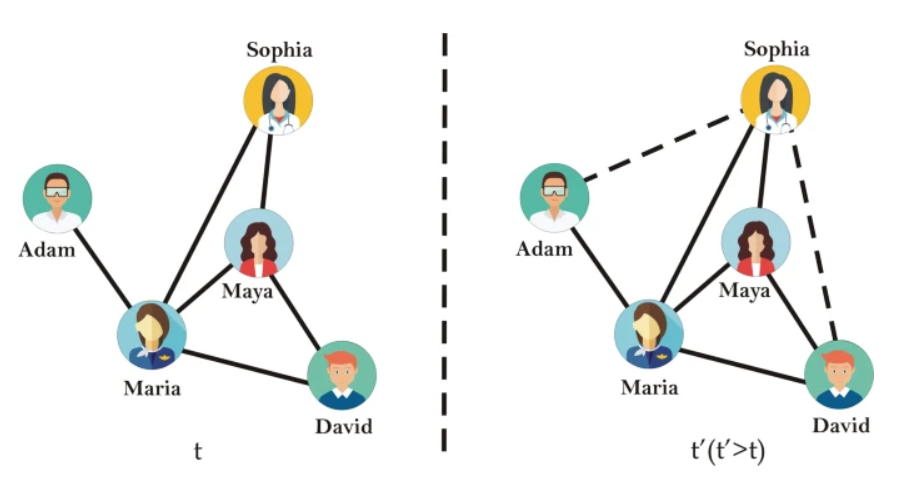

Write an algorithm that uses **BFS** to discover **potentially missing immediate** connections in a network. For example, for the network G shown at time t:

- **PotentialFriends**(G, 'Adam') returns Sophia, Maya, David
- **PotentialFriends**(G, 'David') returns Adam, Sophia
- **PotentialFriends**(G, 'Sophia') returns Adam, David

In [ ]:
from collections import deque

# Start the graph search from root using a doubly-ended queue

def PotentialFriends(graph, root):

    # deque is list-like container with fast appends and pops on either end
    visited, queue = set(), deque([(root, 0)])
    visited.add(root)
    result = []

    # Keep exploring as long as the queue is not empty
    while queue:

        # Dequeue a node from queue
        node = queue.popleft()
        vertex = node[0]
        cur_level = node[1]

        # Append node to result if cur_level is 2
        if cur_level == 2:
          result.append(vertex)

        # If not visited, mark it as visited, and enqueue
        elif cur_level < 2:
          for neighbor in graph[vertex]:
              if neighbor not in visited:
                  visited.add(neighbor)
                  queue.append((neighbor, cur_level + 1))

    return result

In [ ]:
graph2 = {
    'Adam' : ['Maria'],
    'Maria' : ['Adam', 'Sophia', 'Maya', 'David'],
    'Sophia' : ['Maria', 'Maya'],
    'Maya' : ['Maria', 'Sophia', 'David'],
    'David' : ['Maria', 'Maya']
}

print(PotentialFriends(graph2, 'Adam'))